In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os, sys
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# Robobee analysis

In [2]:
def process_datafolder(dirs):
    # sort the data into lists
    wd_list = [file for file in dirs if file.endswith("wd.csv")]
    rd_list = [file for file in dirs if file.endswith("rd.csv")]
    wa_list = [file for file in dirs if file.endswith("wa.csv")]
    ra_list = [file for file in dirs if file.endswith("ra.csv")]
    
    # load dataframes 
    wd_df_list = [pd.read_csv(path+filename, header=None) for filename in wd_list]
    rd_df_list = [pd.read_csv(path+filename, header=None) for filename in rd_list]
    wa_df_list = [pd.read_csv(path+filename, header=None) for filename in wa_list]
    ra_df_list = [pd.read_csv(path+filename, header=None) for filename in ra_list]
    
    # concatenate the dataframes per individual
    distances_df = [pd.concat([wd_df_list[i],rd_df_list[i]], axis=1) for i in range(len(wd_df_list))]
    angles_df = [pd.concat([wa_df_list[i],ra_df_list[i]], axis=1) for i in range(len(wa_df_list))]
    
    return distances_df, angles_df

In [3]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a, axis=0), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [4]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

## Robot

In [5]:
# load all csv files from analyses
path = "data_robobee/tmp_without_videos/robotic_dances/hbd_and_angles_/"
robot_dirs = os.listdir(path)

# sort it to have 
robot_dirs.sort()
print(robot_dirs)

['2011-08-31_13-38-25_ra.csv', '2011-08-31_13-38-25_rd.csv', '2011-08-31_13-38-25_wa.csv', '2011-08-31_13-38-25_wd.csv', '2011-09-03_16-39-39_ra.csv', '2011-09-03_16-39-39_rd.csv', '2011-09-03_16-39-39_wa.csv', '2011-09-03_16-39-39_wd.csv', '2011-09-06_13-58-27_ra.csv', '2011-09-06_13-58-27_rd.csv', '2011-09-06_13-58-27_wa.csv', '2011-09-06_13-58-27_wd.csv', '2011-09-10_14-04-09_1_ra.csv', '2011-09-10_14-04-09_1_rd.csv', '2011-09-10_14-04-09_1_wa.csv', '2011-09-10_14-04-09_1_wd.csv', '2011-09-10_14-04-09_2_ra.csv', '2011-09-10_14-04-09_2_rd.csv', '2011-09-10_14-04-09_2_wa.csv', '2011-09-10_14-04-09_2_wd.csv']


### 1) Head Body Distance

In [6]:
distances_df, angles_df = process_datafolder(robot_dirs)

In [7]:
# mean curve per individual
mean_distances = np.array([np.mean(distances_df[i], axis=0) for i in range(len(distances_df))])

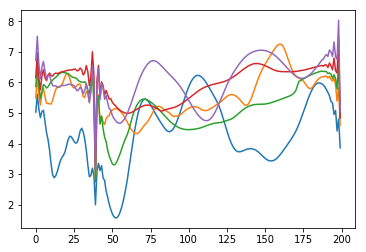

In [8]:
# plot mean curves per individual
for dist in mean_distances:
    sns.lineplot([i for i in range(200)], dist)

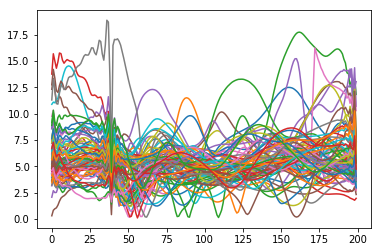

In [9]:
# curve per waggle
df_per_waggle = distances_df[0]
for i in range(1,len(distances_df)):
    df_per_waggle = df_per_waggle.append(distances_df[i])
matrix_per_waggle = df_per_waggle.values
for waggle in matrix_per_waggle:
    sns.lineplot([i for i in range(200)], waggle)

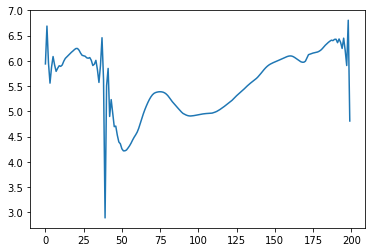

In [10]:
# mean over all waggles
mean_matrix_per_waggle = np.mean(matrix_per_waggle, axis=0)
sns.lineplot([i for i in range(200)], mean_matrix_per_waggle)

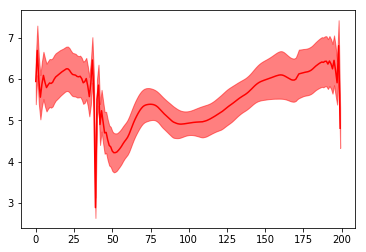

In [11]:
# plot the confidence interval over all individuals means
mean_distance_robot, ub_dr, lb_dr = mean_confidence_interval(matrix_per_waggle)
plot_mean_and_CI(mean_distance_robot, ub_dr, lb_dr, color_mean="red", color_shading="red")

### 2) Body Angle

In [12]:
# mean per individual
mean_angles = [np.mean(angles_df[i], axis=0) for i in range(len(angles_df))]

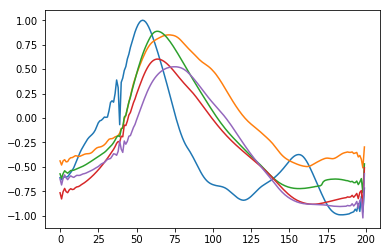

In [13]:
# mean curves per individual
for angle in mean_angles:
    sns.lineplot([i for i in range(200)], angle)

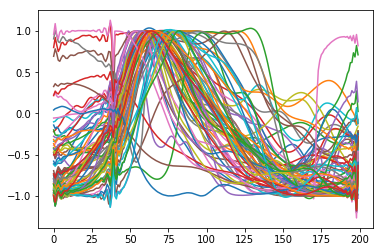

In [14]:
# curve per waggle
df_per_waggle = angles_df[0]
for i in range(1,len(angles_df)):
    df_per_waggle = df_per_waggle.append(angles_df[i])
matrix_per_waggle = df_per_waggle.values
for waggle in matrix_per_waggle:
    sns.lineplot([i for i in range(200)], waggle)

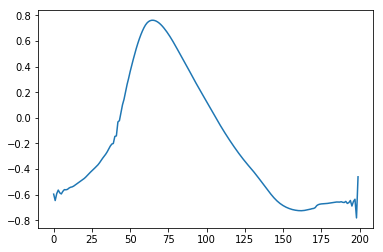

In [15]:
# mean over all waggles
mean_mean_angle = np.mean(matrix_per_waggle, axis=0)
sns.lineplot([i for i in range(200)], mean_mean_angle)

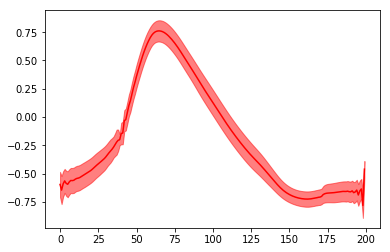

In [16]:
# plot the confidence interval over all individuals means
mean_angle_robot, ub_ar, lb_ar = mean_confidence_interval(matrix_per_waggle)
plot_mean_and_CI(mean_angle_robot, ub_ar, lb_ar, color_mean="red", color_shading="red")

## Natural

In [17]:
# load all csv files from analyses
path = "data_robobee/tmp_without_videos/natural_dances/hbd_and_angles_/"
natural_dirs = os.listdir(path)

# sort it to have 
natural_dirs.sort()
print(natural_dirs)

['2008_08_21-1115_1_ra.csv', '2008_08_21-1115_1_rd.csv', '2008_08_21-1115_1_wa.csv', '2008_08_21-1115_1_wd.csv', '2008_08_21-1115_2_ra.csv', '2008_08_21-1115_2_rd.csv', '2008_08_21-1115_2_wa.csv', '2008_08_21-1115_2_wd.csv', '2008_08_22_1213_3_ra.csv', '2008_08_22_1213_3_rd.csv', '2008_08_22_1213_3_wa.csv', '2008_08_22_1213_3_wd.csv', '2008_08_22_1213_4_ra.csv', '2008_08_22_1213_4_rd.csv', '2008_08_22_1213_4_wa.csv', '2008_08_22_1213_4_wd.csv', '2008_08_22_1213_5a_ra.csv', '2008_08_22_1213_5a_rd.csv', '2008_08_22_1213_5a_wa.csv', '2008_08_22_1213_5a_wd.csv', '2008_08_22_1213_5b_ra.csv', '2008_08_22_1213_5b_rd.csv', '2008_08_22_1213_5b_wa.csv', '2008_08_22_1213_5b_wd.csv', '2008_08_22_1213_6_ra.csv', '2008_08_22_1213_6_rd.csv', '2008_08_22_1213_6_wa.csv', '2008_08_22_1213_6_wd.csv', '2008_08_22_1213_7_ra.csv', '2008_08_22_1213_7_rd.csv', '2008_08_22_1213_7_wa.csv', '2008_08_22_1213_7_wd.csv', '2008_08_22_1213_8_ra.csv', '2008_08_22_1213_8_rd.csv', '2008_08_22_1213_8_wa.csv', '2008_08_22

In [18]:
distances_df, angles_df = process_datafolder(natural_dirs)

In [19]:
# mean curve per individual
mean_distances = np.array([np.mean(distances_df[i], axis=0) for i in range(len(distances_df))])

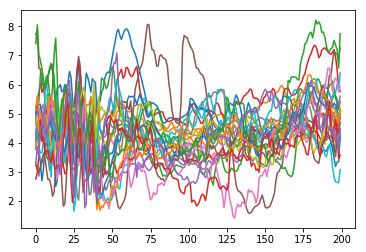

In [20]:
# plot mean curves per individual
for dist in mean_distances:
    sns.lineplot([i for i in range(200)], dist)

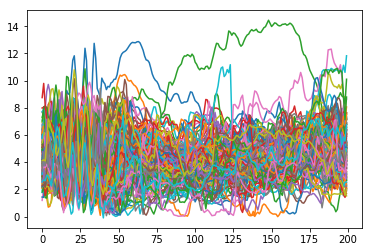

In [21]:
# curve per waggle
df_per_waggle = distances_df[0]
for i in range(1,len(distances_df)):
    df_per_waggle = df_per_waggle.append(distances_df[i])
matrix_per_waggle = df_per_waggle.values
for waggle in matrix_per_waggle:
    sns.lineplot([i for i in range(200)], waggle)

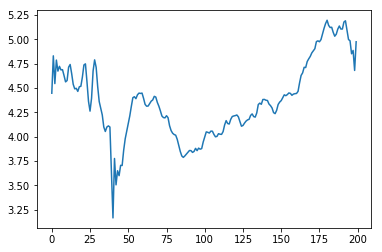

In [22]:
# mean over all waggles
mean_matrix_per_waggle = np.mean(matrix_per_waggle, axis=0)
sns.lineplot([i for i in range(200)], mean_matrix_per_waggle)

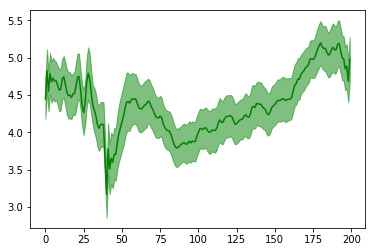

In [23]:
# plot the confidence interval over all individuals means
mean_distance_natural, ub_dn, lb_dn = mean_confidence_interval(matrix_per_waggle)
plot_mean_and_CI(mean_distance_natural, ub_dn, lb_dn, color_mean="green", color_shading="green")

### 2) Body Angle

In [24]:
# mean per individual
mean_angles = [np.mean(angles_df[i], axis=0) for i in range(len(angles_df))]

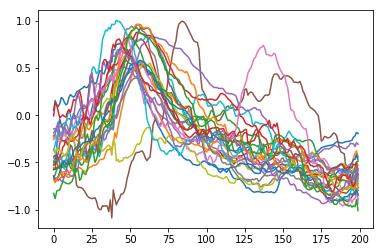

In [25]:
# mean curves per individual
for angle in mean_angles:
    sns.lineplot([i for i in range(200)], angle)

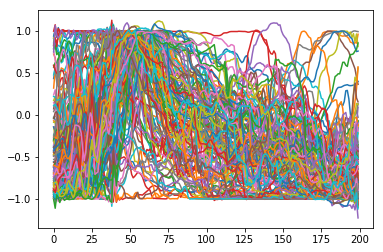

In [26]:
# curve per waggle
df_per_waggle = angles_df[0]
for i in range(1,len(angles_df)):
    df_per_waggle = df_per_waggle.append(angles_df[i])
matrix_per_waggle = df_per_waggle.values
for waggle in matrix_per_waggle:
    sns.lineplot([i for i in range(200)], waggle)

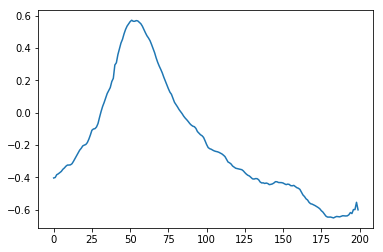

In [27]:
# mean over all waggles
mean_mean_angle = np.mean(matrix_per_waggle, axis=0)
sns.lineplot([i for i in range(200)], mean_mean_angle)

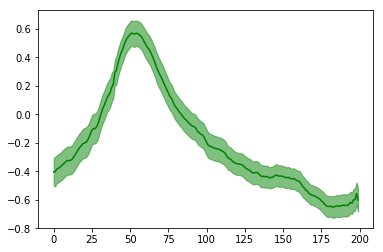

In [28]:
# plot the confidence interval over all individuals means
mean_angle_natural, ub_an, lb_an = mean_confidence_interval(matrix_per_waggle)
plot_mean_and_CI(mean_angle_natural, ub_an, lb_an, color_mean="green", color_shading="green")

# Final results

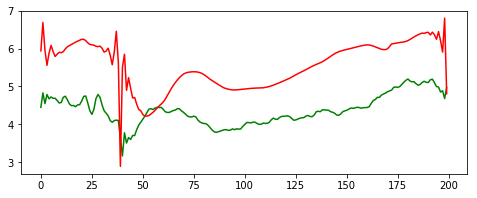

In [36]:
fig = plt.figure(figsize=(8, 3))
sns.lineplot([i for i in range(200)], mean_distance_natural, color="green")
fig = plt.figure(figsize=(10, 3))sns.lineplot([i for i in range(200)], mean_distance_robot, color="red")

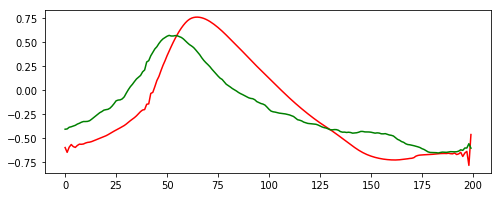

In [37]:
fig = plt.figure(figsize=(8, 3))
sns.lineplot([i for i in range(200)], mean_angle_robot, color="red")
sns.lineplot([i for i in range(200)], mean_angle_natural, color="green")